## Analyze KNN Results

In [1]:
# General imports
import torch
import numpy as np
import os, sys
from tqdm import tqdm
import json
import matplotlib.pyplot as plt
%matplotlib inline
# from sklearn.neighbors import KNeighborsClassifier
# from PIL import Image

In [2]:
# Local imports
sys.path.insert(0, 'src')
from test import predict
from utils import read_json, load_image, read_lists
from utils.analysis import knn, display_nearest_neighbors
import utils.visualizations as visualizations


In [24]:
# Define visualization function

def show_results(results, class_list, idx, title):
    # pre_edit_resuilts = pre_edit_knn[data_type]
    # Keys: 'indices', 'distances', 'image_paths', 'labels'
    anchor_indices = results['indices'][idx]
    anchor_distances = results['distances'][idx]
    anchor_image_paths = results['image_paths'][idx]
    anchor_labels = results['labels'][idx]
    # anchor_labels = [class_list[label] for label in anchor1_labels]
    anchor_titles = []
    for label, distance in zip(anchor_labels, anchor_distances):
        anchor_titles.append("{} ({:.3f})".format(class_list[label], distance))

    display_nearest_neighbors(
        image_paths=anchor_image_paths,
        labels=anchor_titles,
        figure_title=title)

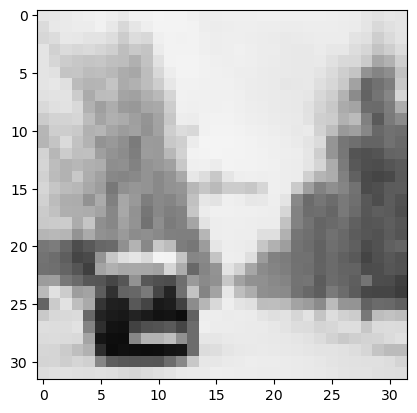

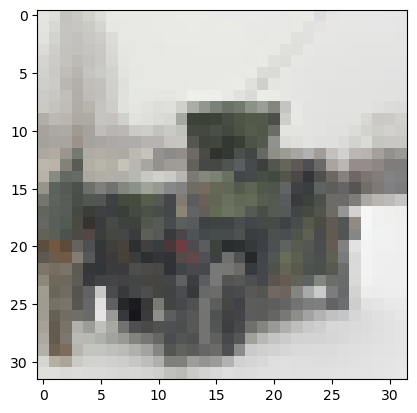

In [3]:
# Define constants, paths
key_image_path = 'data/editing/dummy/tank2.jpg'
value_image_path = 'data/editing/dummy/tank1.jpg'
pre_edit_knn_path = 'saved/edit/debug/CINIC10_ImageNet-VGG_16/1212_173631/models/pre_edit_knn.pth'
post_edit_knn_path = 'saved/edit/debug/CINIC10_ImageNet-VGG_16/1212_173631/models/post_edit_knn.pth'
edited_model_path = 'saved/edit/debug/CINIC10_ImageNet-VGG_16/1212_173631/models/edited_model.pth'

# Class list dictionary
class_list_path = "metadata/cinic-10/class_names.txt"
class_list = read_lists(class_list_path)
IMAGE_SIZE = (32, 32)

# KNN values
knn_data_types = ['images', 'features', 'logits']
K = 10

key_image = load_image(key_image_path, resize=IMAGE_SIZE)
value_image = load_image(value_image_path, resize=IMAGE_SIZE)
visualizations.show_image(key_image)
visualizations.show_image(value_image)

### Load KNN Results Before and After Edit

In [4]:
pre_edit_knn = torch.load(pre_edit_knn_path)
post_edit_knn = torch.load(post_edit_knn_path)

### Features Visualizations

(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)


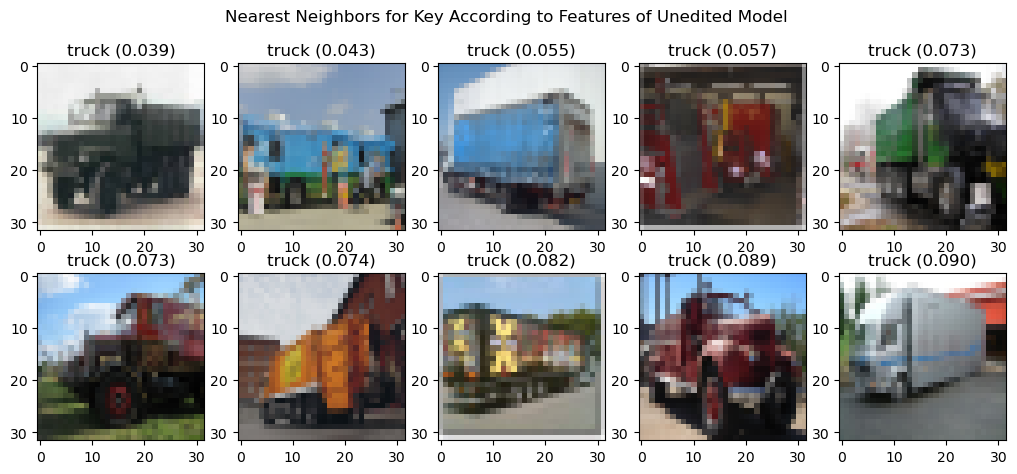

(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)


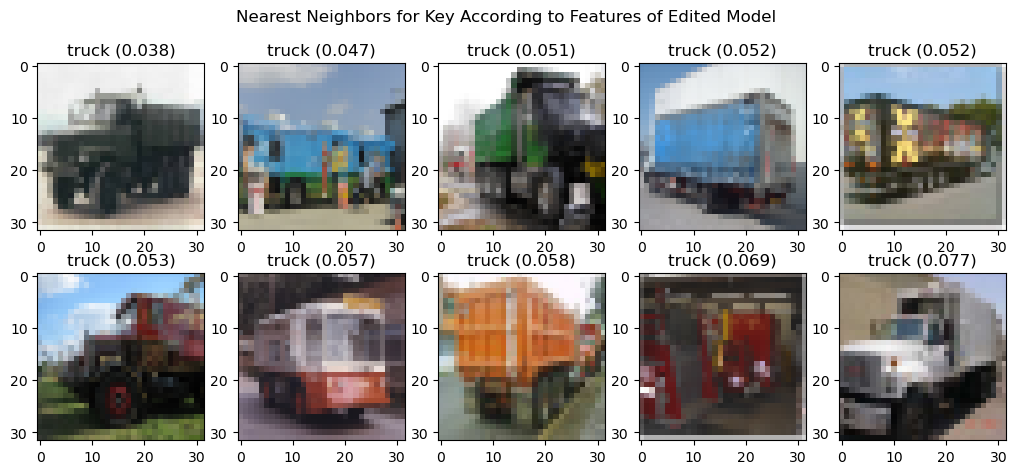

(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)


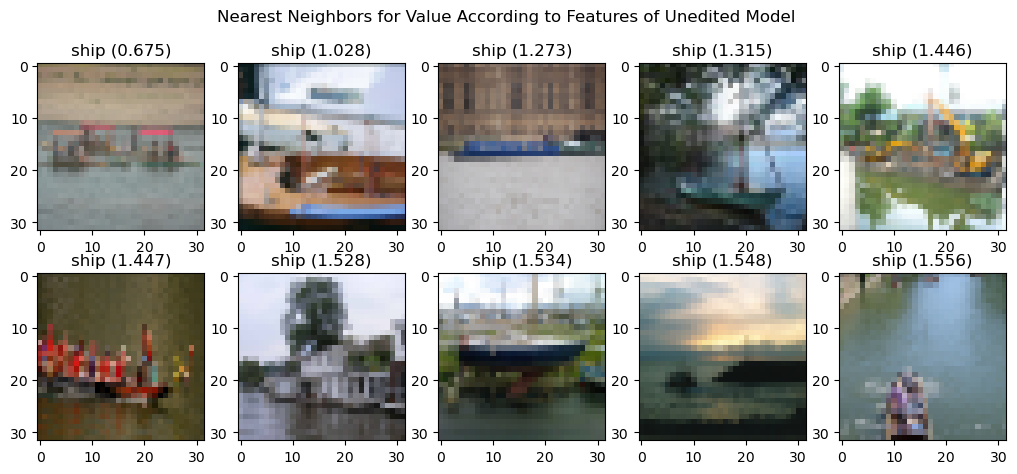

(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)


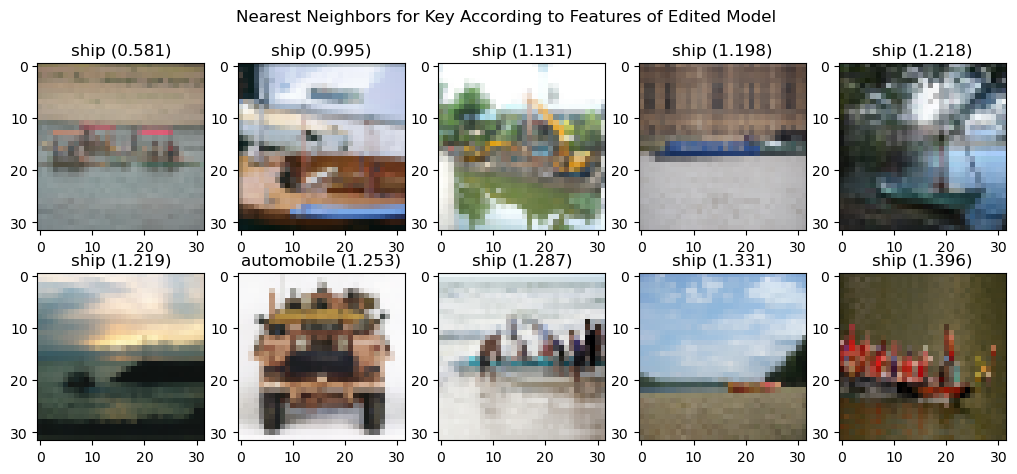

In [26]:
# Show visualizations for KNN for original and modified images according to unedited model

# Based on features first
# data_type = 'features'
pre_edit_feature_knn = pre_edit_knn['features']
post_edit_feature_knn = post_edit_knn['features']

# Pre edit features for key (tank2)
show_results(
    results=pre_edit_feature_knn, 
    class_list=class_list, 
    idx=0, 
    title='Nearest Neighbors for Key According to Features of Unedited Model')

# Post edit features for key (tank2)
show_results(
    results=post_edit_feature_knn, 
    class_list=class_list, 
    idx=0, 
    title='Nearest Neighbors for Key According to Features of Edited Model')

# Features for value (tank1)
show_results(
    results=pre_edit_feature_knn, 
    class_list=class_list, 
    idx=1, 
    title='Nearest Neighbors for Value According to Features of Unedited Model')

show_results(
    results=post_edit_feature_knn, 
    class_list=class_list, 
    idx=1, 
    title='Nearest Neighbors for Key According to Features of Edited Model')


(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)


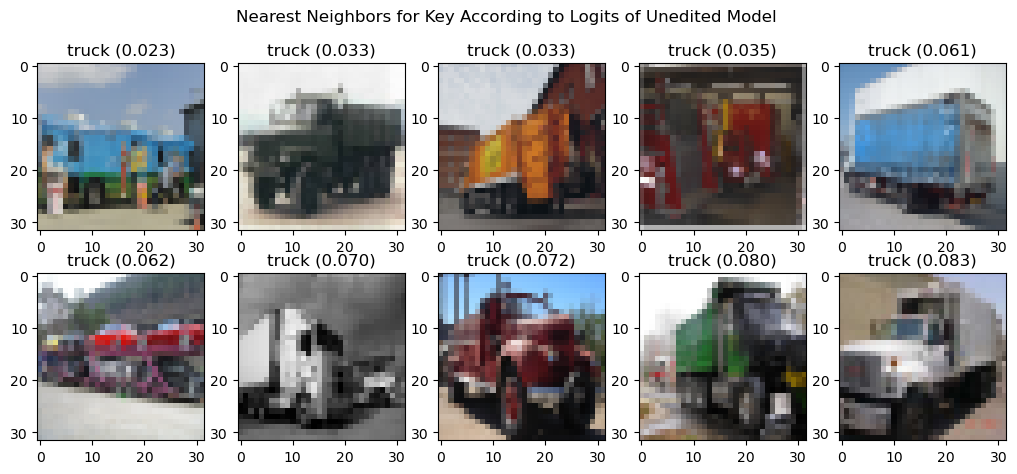

(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)


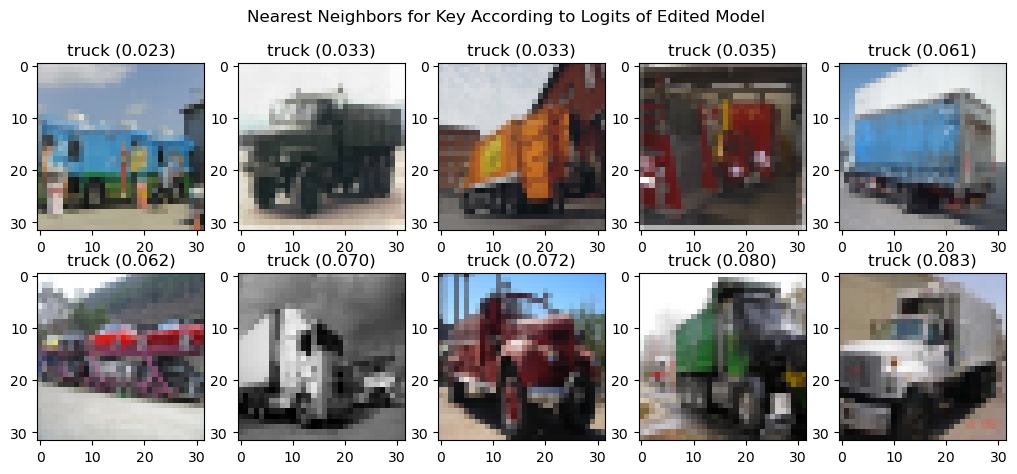

(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)


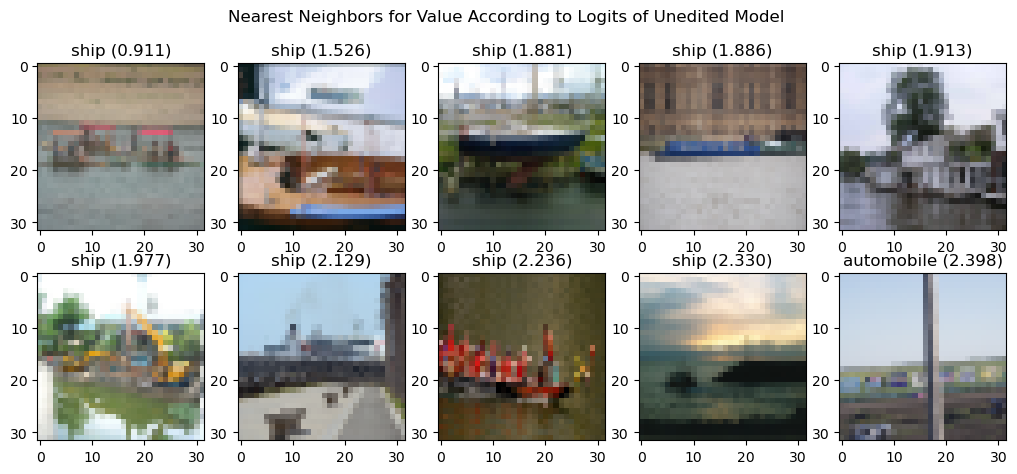

(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)


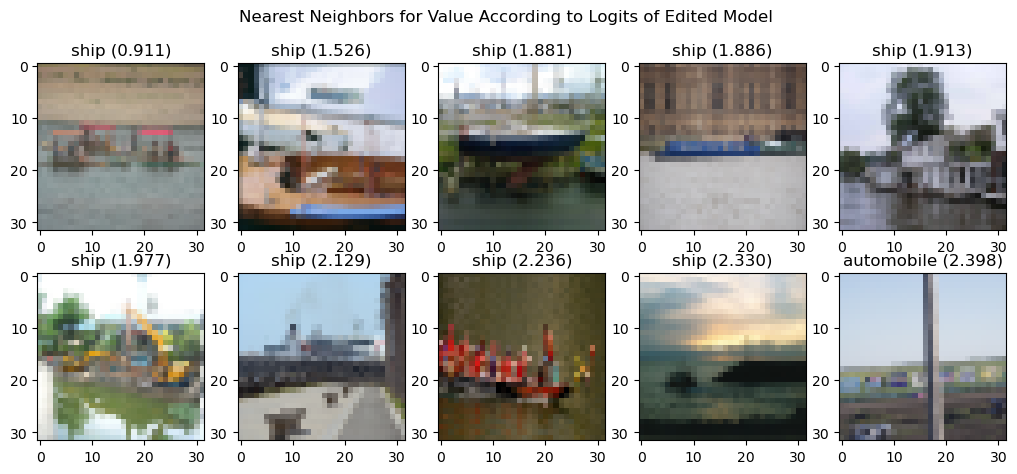

In [28]:
# LOGITS
pre_edit_logits_knn = pre_edit_knn['logits']
post_edit_logits_knn = pre_edit_knn['logits']

# Logits for key (tank2)
show_results(
    results=pre_edit_logits_knn, 
    class_list=class_list, 
    idx=0, 
    title='Nearest Neighbors for Key According to Logits of Unedited Model')
show_results(
    results=post_edit_logits_knn, 
    class_list=class_list, 
    idx=0, 
    title='Nearest Neighbors for Key According to Logits of Edited Model')

# Logits for value (tank1)
show_results(
    results=pre_edit_logits_knn, 
    class_list=class_list, 
    idx=1, 
    title='Nearest Neighbors for Value According to Logits of Unedited Model')
show_results(
    results=post_edit_logits_knn, 
    class_list=class_list, 
    idx=1, 
    title='Nearest Neighbors for Value According to Logits of Edited Model')

(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)


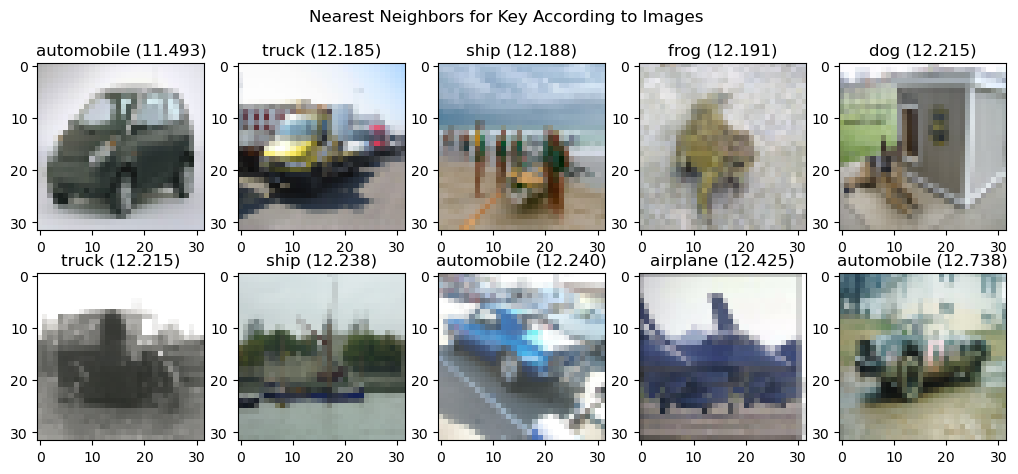

(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)


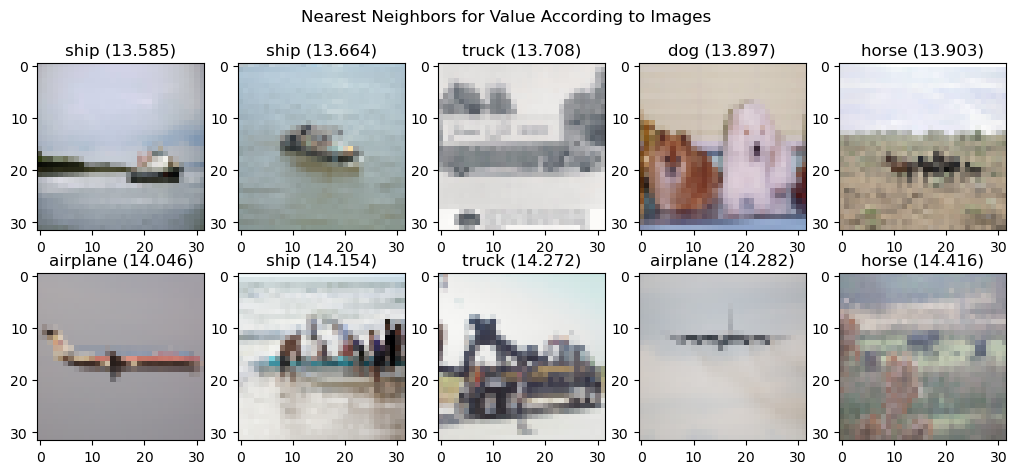

In [30]:
# IMAGES
pre_edit_images_knn = pre_edit_knn['images']
post_edit_images_knn = post_edit_knn['images']
# Features for key (tank2)
show_results(
    results=pre_edit_images_knn, 
    class_list=class_list, 
    idx=0, 
    title='Nearest Neighbors for Key According to Images')
# show_results(
#     results=post_edit_images_knn, 
#     class_list=class_list, 
#     idx=0, 
#     title='Nearest Neighbors for Key According to Images of Edited Model')

# Features for value (tank1)
show_results(
    results=pre_edit_images_knn, 
    class_list=class_list, 
    idx=1, 
    title='Nearest Neighbors for Value According to Images')
# show_results(
#     results=post_edit_images_knn, 
#     class_list=class_list, 
#     idx=1, 
#     title='Nearest Neighbors for Value According to Images of Edited Model')

### Logits Visualization

(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)


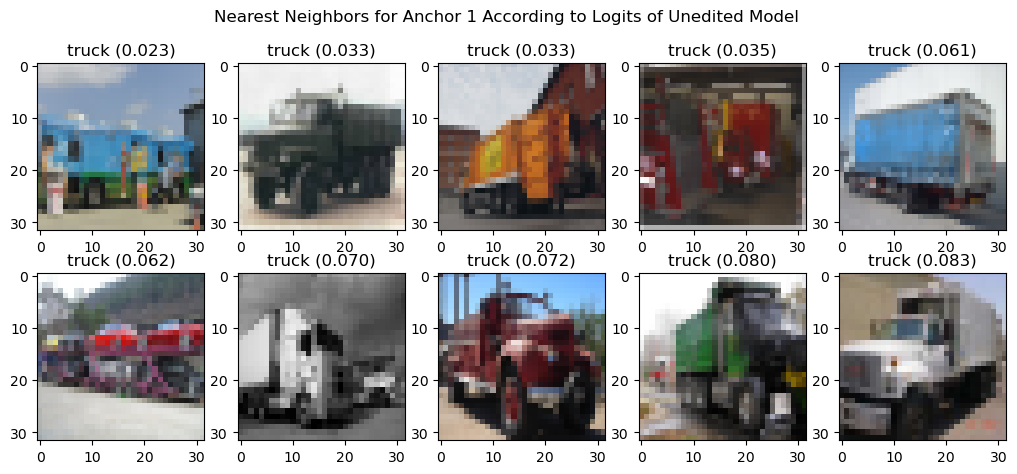

(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)
(3, 32, 32)
post transpose: (32, 32, 3)


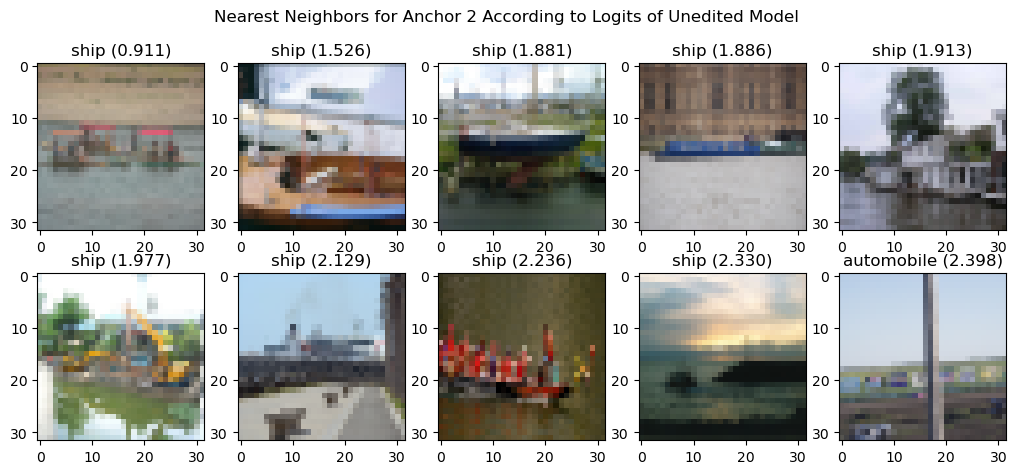

In [17]:
# Based on logits
data_type = 'logits'
pre_edit_resuilts = pre_edit_knn[data_type]
# Keys: 'indices', 'distances', 'image_paths', 'labels'
anchor1_indices = pre_edit_resuilts['indices'][0]
anchor1_distances = pre_edit_resuilts['distances'][0]
anchor1_image_paths = pre_edit_resuilts['image_paths'][0]
anchor1_labels = pre_edit_resuilts['labels'][0]
anchor1_titles = []
for label, distance in zip(anchor1_labels, anchor1_distances):
    anchor1_titles.append("{} ({:.3f})".format(class_list[label], distance))

display_nearest_neighbors(
    image_paths=anchor1_image_paths,
    labels=anchor1_titles,
    figure_title='Nearest Neighbors for Anchor 1 According to Logits of Unedited Model')

anchor2_indices = pre_edit_resuilts['indices'][1]
anchor2_distances = pre_edit_resuilts['distances'][1]
anchor2_image_paths = pre_edit_resuilts['image_paths'][1]
anchor2_labels = pre_edit_resuilts['labels'][1]
# anchor2_labels = [class_list[label] for label in anchor2_labels]

anchor2_titles = []
for label, distance in zip(anchor2_labels, anchor2_distances):
    anchor2_titles.append("{} ({:.3f})".format(class_list[label], distance))

display_nearest_neighbors(
    image_paths=anchor2_image_paths,
    labels=anchor2_titles,
    figure_title='Nearest Neighbors for Anchor 2 According to Logits of Unedited Model')

### Images Visualization

In [ ]:
# Based on images
data_type = 'images'
pre_edit_resuilts = pre_edit_knn[data_type]
# Keys: 'indices', 'distances', 'image_paths', 'labels'
anchor1_indices = pre_edit_resuilts['indices'][0]
anchor1_distances = pre_edit_resuilts['distances'][0]
anchor1_image_paths = pre_edit_resuilts['image_paths'][0]
anchor1_labels = pre_edit_resuilts['labels'][0]
anchor1_labels = [class_list[label] for label in anchor1_labels]

display_nearest_neighbors(
    image_paths=anchor1_image_paths,
    labels=anchor1_labels,
    figure_title='Nearest Neighbors for Anchor 1 According to Images')

anchor2_indices = pre_edit_resuilts['indices'][1]
anchor2_distances = pre_edit_resuilts['distances'][1]
anchor2_image_paths = pre_edit_resuilts['image_paths'][1]
anchor2_labels = pre_edit_resuilts['labels'][1]
anchor2_labels = [class_list[label] for label in anchor2_labels]

display_nearest_neighbors(
    image_paths=anchor2_image_paths,
    labels=anchor2_labels,
    figure_title='Nearest Neighbors for Anchor 2 According to Images')
print(pre_edit_resuilts['distances'])

## Visualize!

In [31]:
# def show_image_rows(images, 
#                     image_titles=None, 
#                     image_size=(2.5, 2.5),
#                     row_labels=None,
#                     figure_title=None, 
#                     font_size=12,
#                     save_path=None):
#     """
#     Display rows of images

#     Arg(s):
#         images : list[list[np.array]]
#             2D array of images to display
#         image_labels : list[list[str]] or None
#             2D array of image labels, must be same shape as iamges
#         image_size : (float, float)
#             width, height of each image
#         row_labels : list[str]
#             list of labels for each row, must be same length as len(images)
#         figure_title : str
#             title for overall figure
#         font_size : int
#             font size
#         save_path : str
#             path to save figure to
#     """

#     n_rows, n_cols = len(images), len(images[0])
#     # Shape sanity checks
#     if image_titles is not None:
#         assert len(image_titles) == n_rows
#         assert len(image_titles[0]) == n_cols
#     if row_labels is not None:
#         assert len(row_labels) == n_rows
    
#     fig, axs = plt.subplots(n_rows, n_cols, figsize=(image_size[0] * n_cols, image_size[1] * n_rows))

#     for row in range(n_rows):
#         for col in range(n_cols):
#             # Obtain correct axis
#             ax = axs[row, col]
            
#             # Display the image
#             image = images[row][col]
#             if image is None:
#                 continue
#             print(type(image))
#             if image.shape[0] == 3:
#                 image = torch.tensor(image)
#                 image = torch.permute(image, (1, 2, 0)) 
#                 # FOR SOME REASON I KEEP GETTING numpy has no attribute transpose
#                 # np.tranpose(image, (1, 2, 0))
                
#             ax.imshow(image)
            
#             # Display row text if first image in row
#             if row_labels is not None and col == 0:
#                 ax.set_ylabel(row_labels[row], fontsize=font_size)
#             # Display image title
#             if image_titles is not None:
#                 ax.set_title(image_titles[row][col], fontsize=font_size)
    
#     # Set figure title
#     if figure_title is not None:
#         fig.suptitle(figure_title, fontsize=font_size)
    
#     # Save if path is provided
#     if save_path is not None:
#         plt.savefig(save_path, bbox_inches='tight')
        
#     plt.show()

In [32]:
# def make_grid(flattened, items_per_row):
#     length = len(flattened)
#     grid = []
#     for i in range(0, length, items_per_row):
#         if i + items_per_row <= length:
#             grid.append(flattened[i: i + items_per_row])
#         else:
#             padded_row = flattened[i:]
#             while len(padded_row) < items_per_row:
#                 padded_row.append(None)
#             grid.append(padded_row)
#     return grid

# def display_nearest_neighbors(image_paths, 
#                               labels, 
#                               items_per_row=5,
#                               image_size=(2.5, 2.5),
#                               row_labels=None,
#                               figure_title=None, 
#                               font_size=12,
#                               save_path=None):
#     '''
#     Show images of nearest neighbors
    
#     Arg(s):
#         image_paths : list[str]
#             list of paths to images 
#         labels : list[str]
#             list of labels of images
        
#     '''
#     assert len(image_paths) == len(labels)
    
#     images = []
#     for image_path in image_paths:
#         image = load_image(image_path)
#         images.append(image)
    
#     # Convert images and labels to grid
#     images = make_grid(images, items_per_row)
#     labels = make_grid(labels, items_per_row)
    
#     show_image_rows(
#         images=images,
#         image_titles=labels,
#         row_labels=row_labels,
#         figure_title=figure_title,
#         font_size=font_size,
#         save_path=save_path)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


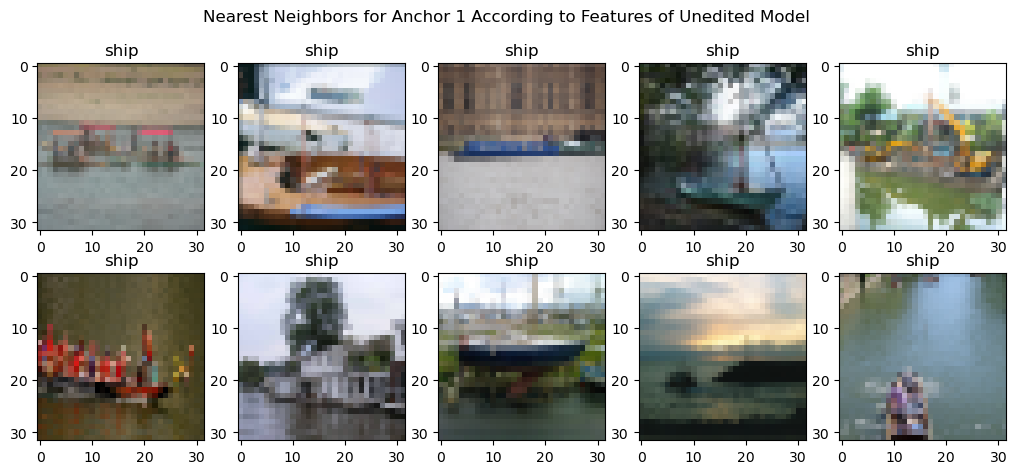

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


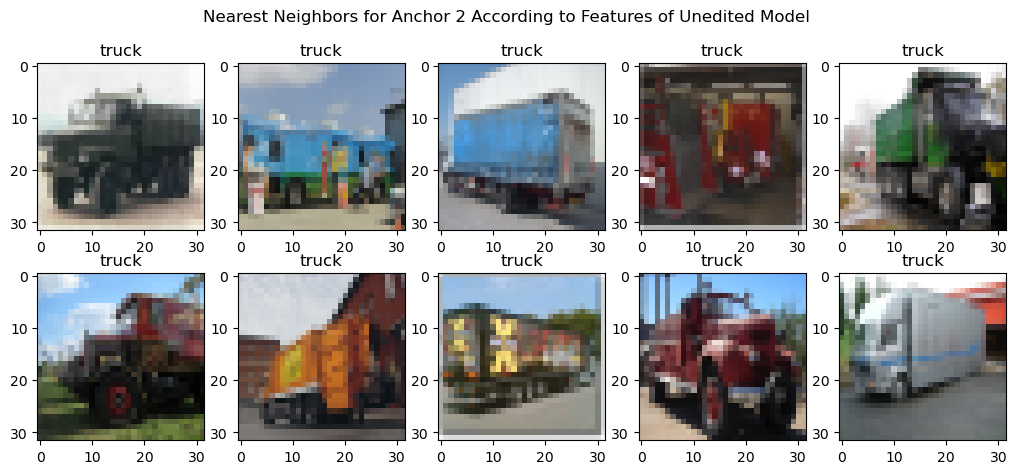

In [33]:
# Show visualizations for KNN for original and modified images according to unedited model

# Based on features first
data_type = 'features'
pre_edit_resuilts = pre_edit_knn[data_type]
# Keys: 'indices', 'distances', 'image_paths', 'labels'
anchor1_indices = pre_edit_resuilts['indices'][0]
anchor1_distances = pre_edit_resuilts['distances'][0]
anchor1_image_paths = pre_edit_resuilts['image_paths'][0]
anchor1_labels = pre_edit_resuilts['labels'][0]
anchor1_labels = [class_list[label] for label in anchor1_labels]

display_nearest_neighbors(
    image_paths=anchor1_image_paths,
    labels=anchor1_labels,
    figure_title='Nearest Neighbors for Anchor 1 According to Features of Unedited Model')

anchor2_indices = pre_edit_resuilts['indices'][1]
anchor2_distances = pre_edit_resuilts['distances'][1]
anchor2_image_paths = pre_edit_resuilts['image_paths'][1]
anchor2_labels = pre_edit_resuilts['labels'][1]
anchor2_labels = [class_list[label] for label in anchor2_labels]

display_nearest_neighbors(
    image_paths=anchor2_image_paths,
    labels=anchor2_labels,
    figure_title='Nearest Neighbors for Anchor 2 According to Features of Unedited Model')

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


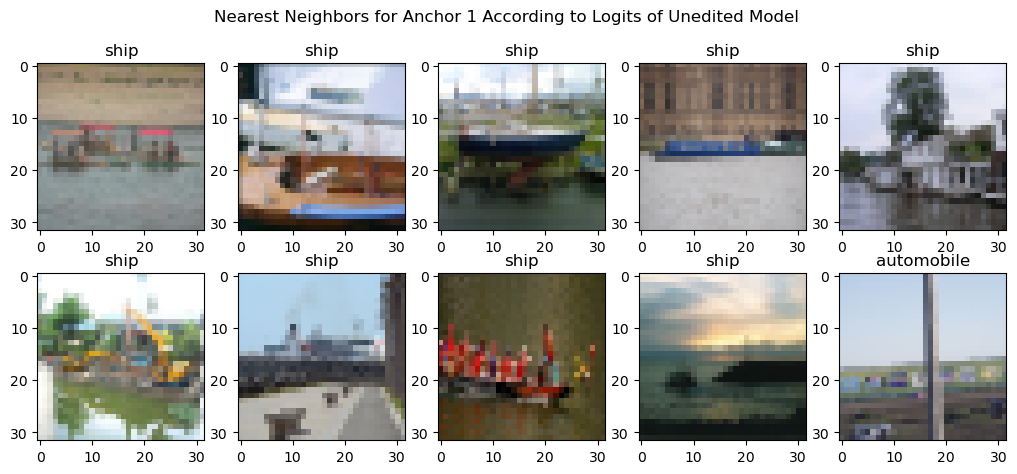

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


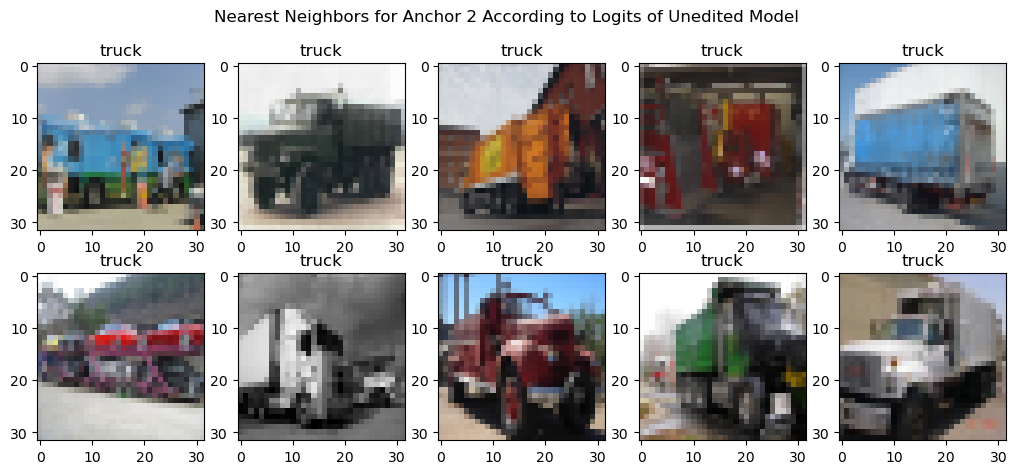

[[0.9110541  1.52571767 1.88128399 1.88561757 1.91287923 1.97722367
  2.12889679 2.23564063 2.32994629 2.39812043]
 [0.02289848 0.03287384 0.0331956  0.03493062 0.06094003 0.06221121
  0.0702924  0.07190096 0.07984021 0.08269125]]


In [35]:
# Based on logits
data_type = 'logits'
pre_edit_resuilts = pre_edit_knn[data_type]
# Keys: 'indices', 'distances', 'image_paths', 'labels'
anchor1_indices = pre_edit_resuilts['indices'][0]
anchor1_distances = pre_edit_resuilts['distances'][0]
anchor1_image_paths = pre_edit_resuilts['image_paths'][0]
anchor1_labels = pre_edit_resuilts['labels'][0]
anchor1_labels = [class_list[label] for label in anchor1_labels]

display_nearest_neighbors(
    image_paths=anchor1_image_paths,
    labels=anchor1_labels,
    figure_title='Nearest Neighbors for Anchor 1 According to Logits of Unedited Model')

anchor2_indices = pre_edit_resuilts['indices'][1]
anchor2_distances = pre_edit_resuilts['distances'][1]
anchor2_image_paths = pre_edit_resuilts['image_paths'][1]
anchor2_labels = pre_edit_resuilts['labels'][1]
anchor2_labels = [class_list[label] for label in anchor2_labels]

display_nearest_neighbors(
    image_paths=anchor2_image_paths,
    labels=anchor2_labels,
    figure_title='Nearest Neighbors for Anchor 2 According to Logits of Unedited Model')


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


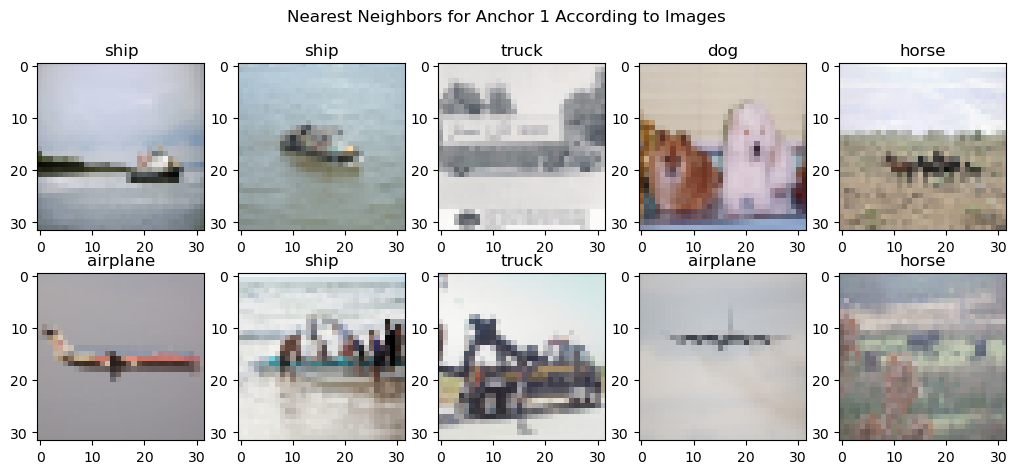

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


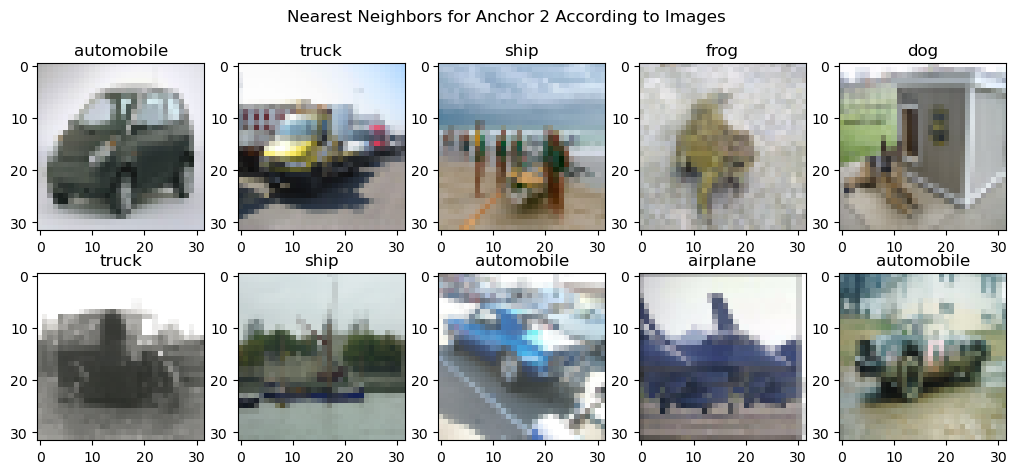

[[13.585139  13.66429   13.70831   13.896945  13.903086  14.046116
  14.153974  14.271581  14.281904  14.415839 ]
 [11.493181  12.184909  12.187613  12.190976  12.21452   12.21461
  12.238081  12.2398405 12.42454   12.738087 ]]


In [36]:
# Based on images
data_type = 'images'
pre_edit_resuilts = pre_edit_knn[data_type]
# Keys: 'indices', 'distances', 'image_paths', 'labels'
anchor1_indices = pre_edit_resuilts['indices'][0]
anchor1_distances = pre_edit_resuilts['distances'][0]
anchor1_image_paths = pre_edit_resuilts['image_paths'][0]
anchor1_labels = pre_edit_resuilts['labels'][0]
anchor1_labels = [class_list[label] for label in anchor1_labels]

display_nearest_neighbors(
    image_paths=anchor1_image_paths,
    labels=anchor1_labels,
    figure_title='Nearest Neighbors for Anchor 1 According to Images')

anchor2_indices = pre_edit_resuilts['indices'][1]
anchor2_distances = pre_edit_resuilts['distances'][1]
anchor2_image_paths = pre_edit_resuilts['image_paths'][1]
anchor2_labels = pre_edit_resuilts['labels'][1]
anchor2_labels = [class_list[label] for label in anchor2_labels]

display_nearest_neighbors(
    image_paths=anchor2_image_paths,
    labels=anchor2_labels,
    figure_title='Nearest Neighbors for Anchor 2 According to Images')
print(pre_edit_resuilts['distances'])

<class 'str'>


AttributeError: 'str' object has no attribute 'shape'

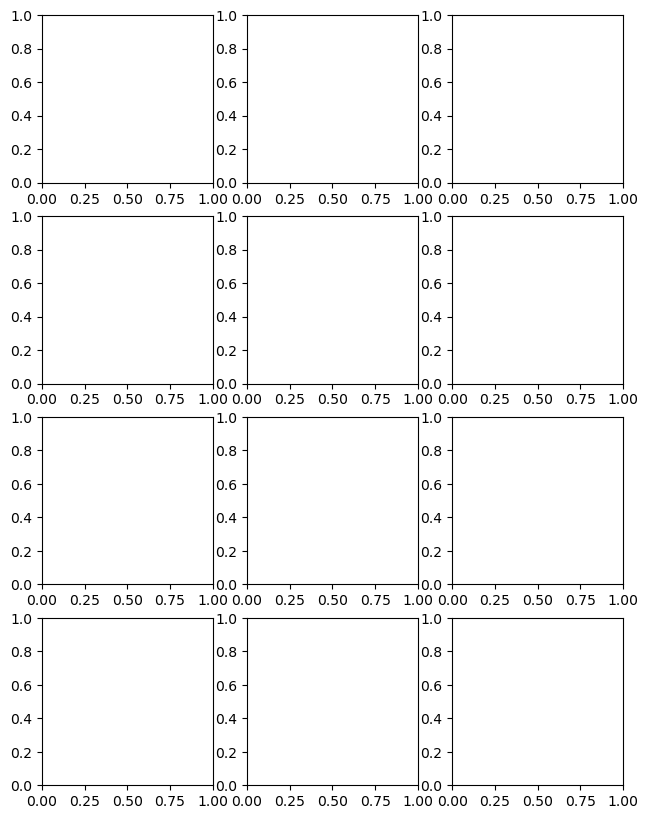

In [27]:
show_image_rows(
    images=images_grid,
    image_titles=labels_grid,
    image_size=(2.5, 2.5),
    font_size=12)

In [21]:
# Load base images and convert to tensor

base_image1 = load_image(base_image1_path, resize=IMAGE_SIZE)
base_image1 = torch.tensor(base_image1).type(torch.float32)
base_image2 = load_image(base_image2_path, resize=IMAGE_SIZE)
base_image2 = torch.tensor(base_image2).type(torch.float32)

torch.Size([3, 32, 32])


In [ ]:
# Perform KNN for images
data_type = 'images'
all_data, labels, image_paths, base_data = prepare_knn(
    data_loader=val_data_loader,
    model=model,
    base_image=base_image,
    data_type=data_type
)

distances, indices = knn(
    K=K,
    data=all_data,
    labels=labels,
    point=base_data)

neighbor_image_paths = [image_paths[idx] for idx in indices[0]]
neighbor_labels = [labels[idx] for idx in indices[0]]
print(neighbor_labels)
for path, label in zip(neighbor_image_paths, neighbor_labels):
    image = load_image(path)
    image = np.transpose(image, (1, 2, 0))
    show_image(image)
    print(label)

In [ ]:
# Perform KNN for logits
data_type = 'images'
all_data, labels, image_paths, base_data = prepare_knn(
    data_loader=val_data_loader,
    model=model,
    base_image=base_image,
    data_type=data_type
)

distances, indices = knn(
    K=K,
    data=all_data,
    labels=labels,
    point=base_data)

neighbor_image_paths = [image_paths[idx] for idx in indices[0]]
neighbor_labels = [labels[idx] for idx in indices[0]]
print(neighbor_labels)
for path, label in zip(neighbor_image_paths, neighbor_labels):
    image = load_image(path)
    image = np.transpose(image, (1, 2, 0))
    show_image(image)
    print(label)